___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import gensim
import transformers

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


In [3]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = data.copy()

### Data Wrangling

In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Clothing ID,767,1080,1077,1049,847
Age,33,34,60,50,47
Title,NaN,NaN,Some major design flaws,My favorite buy!,Flattering shirt
Review Text,Absolutely wonderful - silky and sexy and comf...,Love this dress! it's sooo pretty. i happene...,I had such high hopes for this dress and reall...,"I love, love, love this jumpsuit. it's fun, fl...",This shirt is very flattering to all due to th...
Rating,4,5,3,5,5
Recommended IND,1,1,0,1,1
Positive Feedback Count,0,4,0,0,6
Division Name,Initmates,General,General,General Petite,General
Department Name,Intimate,Dresses,Dresses,Bottoms,Tops


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [7]:
df.duplicated().sum()

0

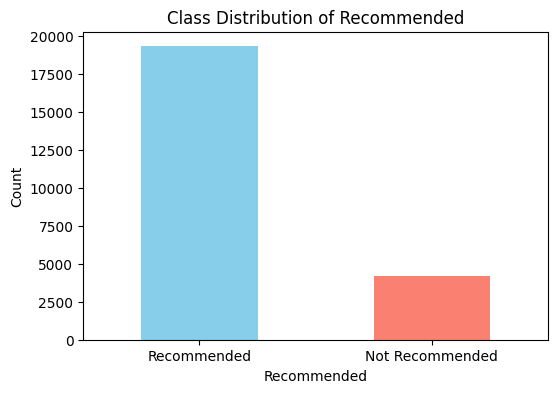

In [8]:
plt.figure(figsize=(6, 4))
df['Recommended IND'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Recommended')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['Not Recommended', 'Recommended'], rotation=0)
plt.show()

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [9]:
df['Recommended IND'].value_counts()

,count
Recommended IND,
1,19314
0,4172


In [10]:
df['Recommended IND'].value_counts(normalize=True)

,proportion
Recommended IND,
1,0.822362
0,0.177638


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [11]:
df = df[['Review Text', 'Recommended IND']]

In [12]:
df = df.rename(columns={
    'Review Text': 'review_text',
    'Recommended IND': 'recommended'
})

---
---


### Missing Value Detection

In [13]:
 df.isna().sum()

,0
review_text,845
recommended,0


In [14]:
df = df.dropna(subset=['review_text'])

In [15]:
df.isna().sum()

,0
review_text,0
recommended,0


In [16]:
df.duplicated().sum()

7

In [17]:
df = df.drop_duplicates()

In [18]:
df.head()

,review_text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
def clean_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    # Sayılar ve noktalama işaretlerini kaldırma
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\d+", "", text)
    # Tokenization
    words = word_tokenize(text)
    # Stop words ve lemmas
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [22]:
df['cleaned_review_text'] = df['review_text'].apply(clean_text)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [23]:
positive_reviews = df[df['recommended'] == 1]['cleaned_review_text']

In [24]:
negative_reviews = df[df['recommended'] == 0]['cleaned_review_text']

### Collect Words (positive and negative separately)

In [25]:
positive_text = " ".join(positive_reviews)

In [26]:
negative_text = " ".join(negative_reviews)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [27]:
from wordcloud import WordCloud

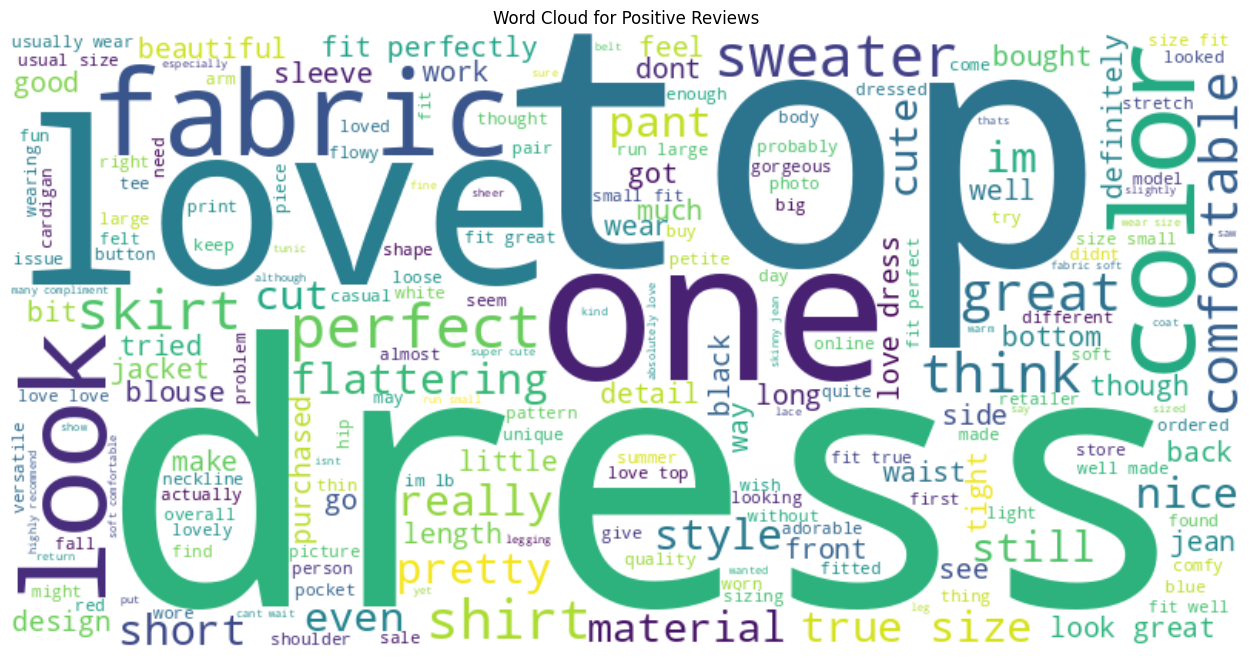

In [28]:
# recommended wordcloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(16, 8))

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

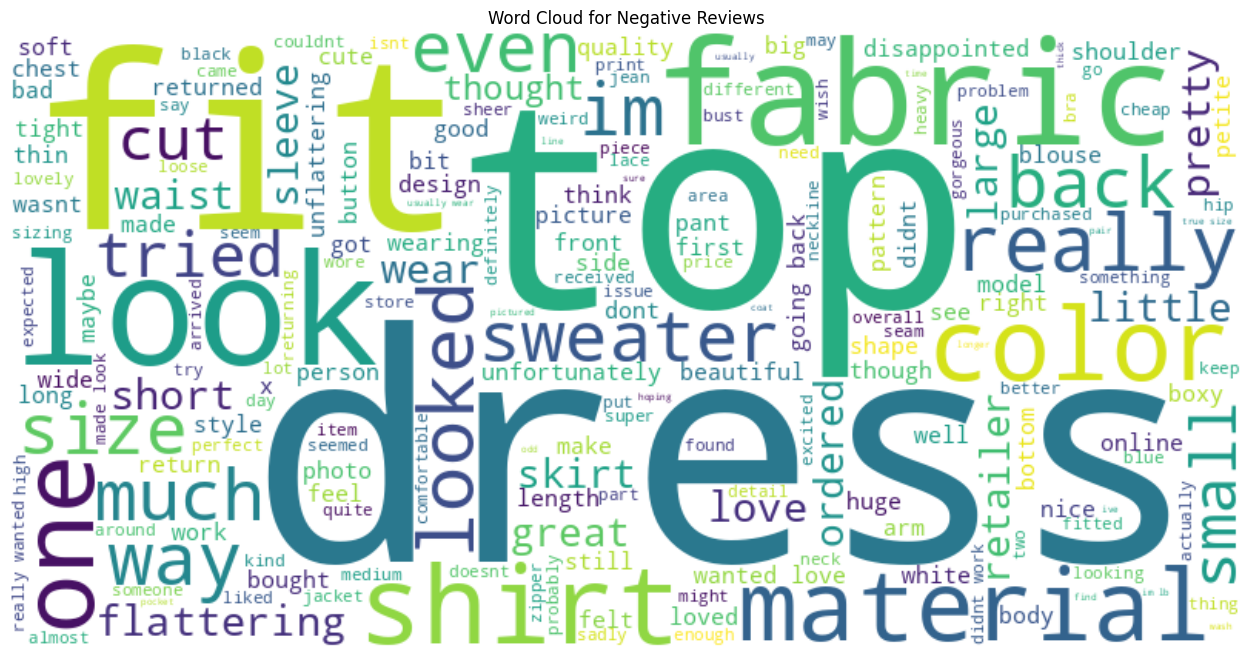

In [29]:
# not recommended wordcloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(16, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
df['recommended'] = df['recommended'].map({1:0, 0:1})

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df['review_text']
y = df['recommended']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [35]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [36]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
pd.DataFrame(X_train_count.toarray(),
             columns=count_vectorizer.get_feature_names_out())

,00,000,00p,02,03,03dd,04,06,0dd,0in,0p,0petite,0r,0verall,0xs,10,100,1000,100lb,100lbs,102,102lbs,103,103lbs,104,...,yup,zag,zara,zermatt,zero,zeros,zig,zigzag,zigzagging,zillion,zip,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoom,zooming,zuma,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [38]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [39]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

,00,000,00p,02,03,03dd,04,06,0dd,0in,0p,0petite,0r,0verall,0xs,10,100,1000,100lb,100lbs,102,102lbs,103,103lbs,104,...,yup,zag,zara,zermatt,zero,zeros,zig,zigzag,zigzagging,zillion,zip,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoom,zooming,zuma,ã¼ber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [42]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.01, class_weight = "balanced", max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [44]:
print("Countvectorizer LOG MODEL")
eval(log, X_train_count, X_test_count)

Countvectorizer LOG MODEL
[[3191  493]
 [ 114  729]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3684
           1       0.60      0.86      0.71       843

    accuracy                           0.87      4527
   macro avg       0.78      0.87      0.81      4527
weighted avg       0.90      0.87      0.87      4527

Train_Set
[[12837  2013]
 [  329  2928]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14850
           1       0.59      0.90      0.71      3257

    accuracy                           0.87     18107
   macro avg       0.78      0.88      0.82     18107
weighted avg       0.91      0.87      0.88     18107



In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, average_precision_score


model = LogisticRegression(C = 0.01, class_weight = "balanced", max_iter=1000)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores_log_c = pd.DataFrame(scores, index = range(1, 11))
df_scores_log_c.mean()[2:]

,0
test_precision,0.563872
train_precision,0.593409
test_recall,0.852610
train_recall,0.899772
test_f1,0.678609
train_f1,0.715160
test_accuracy,0.854696
train_accuracy,0.871075


In [47]:
!pip install -q mljar-scikit-plot

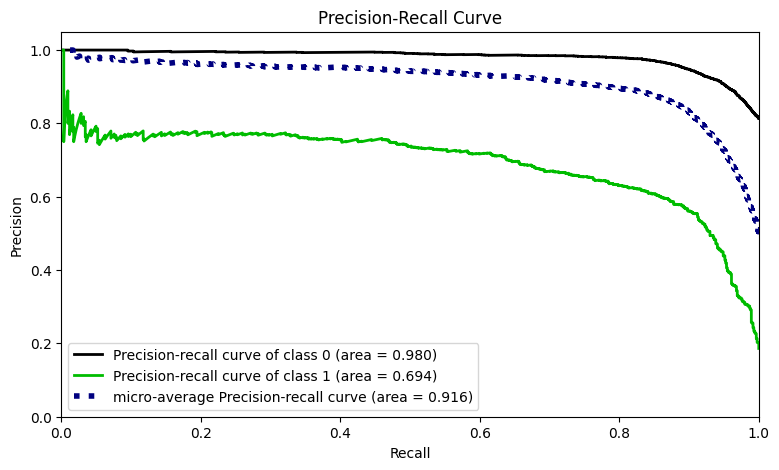

In [48]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.01, class_weight = "balanced", max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [49]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,class_weight = 'balanced' ,max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [51]:
print("TF-IDF LOG MODEL")
eval(log, X_train_tfidf, X_test_tfidf)

TF-IDF LOG MODEL
[[3040  644]
 [ 129  714]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3684
           1       0.53      0.85      0.65       843

    accuracy                           0.83      4527
   macro avg       0.74      0.84      0.77      4527
weighted avg       0.88      0.83      0.84      4527

Train_Set
[[12099  2751]
 [  490  2767]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14850
           1       0.50      0.85      0.63      3257

    accuracy                           0.82     18107
   macro avg       0.73      0.83      0.76     18107
weighted avg       0.88      0.82      0.84     18107



In [52]:
model = LogisticRegression(C=0.01, class_weight = 'balanced', max_iter=1000)
scores = cross_validate(model, X_train_tfidf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.492125
train_precision,0.501290
test_recall,0.829897
train_recall,0.849725
test_f1,0.617695
train_f1,0.630575
test_accuracy,0.815154
train_accuracy,0.820910


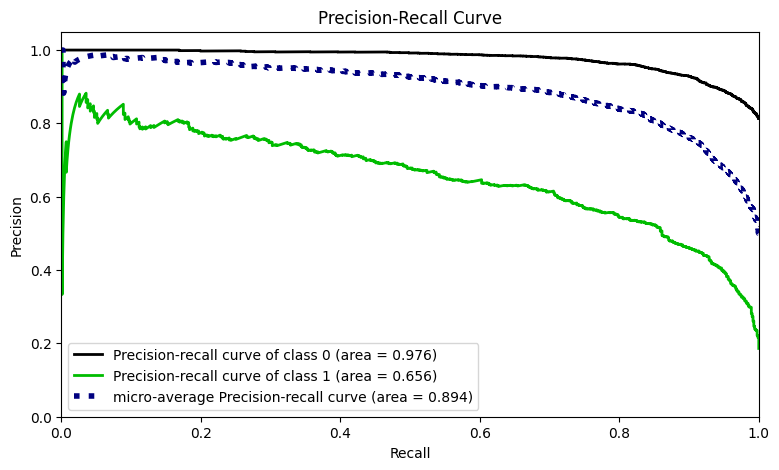

In [53]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.01, class_weight = 'balanced', max_iter=1000)

model.fit(X_train_tfidf, y_train)

y_pred_proba = model.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [54]:
y_pred = log.predict(X_test_tfidf)
y_pred_proba= log.predict_proba(X_test_tfidf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [55]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [56]:
nb = MultinomialNB(alpha = 5, fit_prior = False)
nb.fit(X_train_count, y_train)

MultinomialNB(alpha=5, fit_prior=False)

In [57]:
print("Countvectorizer_NB MODEL")
eval(nb, X_train_count, X_test_count)

Countvectorizer_NB MODEL
[[3636   48]
 [ 562  281]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      3684
           1       0.85      0.33      0.48       843

    accuracy                           0.87      4527
   macro avg       0.86      0.66      0.70      4527
weighted avg       0.86      0.87      0.84      4527

Train_Set
[[14652   198]
 [ 2005  1252]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14850
           1       0.86      0.38      0.53      3257

    accuracy                           0.88     18107
   macro avg       0.87      0.69      0.73     18107
weighted avg       0.88      0.88      0.86     18107



In [58]:
model = MultinomialNB(alpha = 2.1,force_alpha = True, fit_prior = False)
scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.686333
train_precision,0.747836
test_recall,0.686210
train_recall,0.760891
test_f1,0.685977
train_f1,0.754304
test_accuracy,0.887060
train_accuracy,0.910839


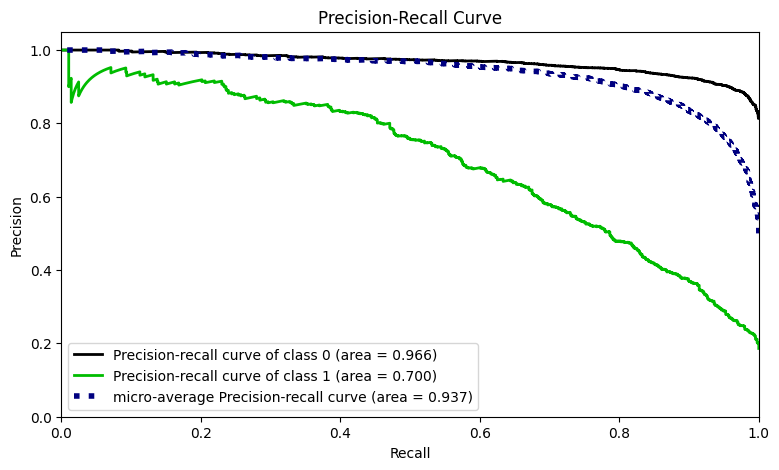

In [59]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha = 5,force_alpha = True, fit_prior = False)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [60]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [61]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = BernoulliNB(alpha=0.8, fit_prior = False)#MultinomialNB(force_alpha = True, fit_prior = False)
nb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=0.8, fit_prior=False)

In [62]:
print("TF - IDF NB MODEL")
eval(nb, X_train_tfidf, X_test_tfidf)

TF - IDF NB MODEL
[[3268  416]
 [ 198  645]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3684
           1       0.61      0.77      0.68       843

    accuracy                           0.86      4527
   macro avg       0.78      0.83      0.80      4527
weighted avg       0.88      0.86      0.87      4527

Train_Set
[[13331  1519]
 [  502  2755]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     14850
           1       0.64      0.85      0.73      3257

    accuracy                           0.89     18107
   macro avg       0.80      0.87      0.83     18107
weighted avg       0.91      0.89      0.89     18107



In [63]:
model = BernoulliNB(alpha=0.7, force_alpha = True, fit_prior = False)
scores = cross_validate(model, X_train_tfidf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.571115
train_precision,0.649686
test_recall,0.790302
train_recall,0.851329
test_f1,0.662790
train_f1,0.736962
test_accuracy,0.855415
train_accuracy,0.890687


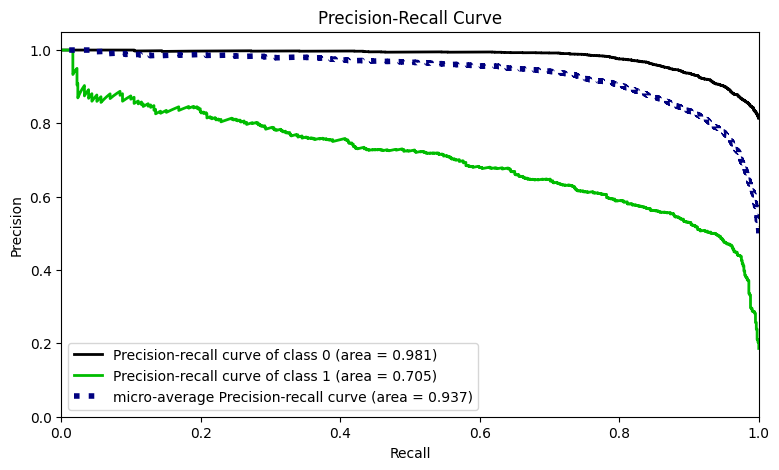

In [64]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = BernoulliNB(alpha=0.7, force_alpha = True, fit_prior = False)

model.fit(X_train_tfidf, y_train)

y_pred_proba = model.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [65]:
y_pred = nb.predict(X_test_tfidf)
y_pred_proba= nb.predict_proba(X_test_tfidf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [66]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight = 'balanced', random_state = 42)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=42)

In [67]:
print("Countvectorizer_SVC MODEL")
eval(svc, X_train_count, X_test_count)

Countvectorizer_SVC MODEL
[[3263  421]
 [ 133  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3684
           1       0.63      0.84      0.72       843

    accuracy                           0.88      4527
   macro avg       0.79      0.86      0.82      4527
weighted avg       0.90      0.88      0.88      4527

Train_Set
[[13366  1484]
 [  157  3100]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14850
           1       0.68      0.95      0.79      3257

    accuracy                           0.91     18107
   macro avg       0.83      0.93      0.87     18107
weighted avg       0.93      0.91      0.91     18107



In [68]:
model = LinearSVC(C=0.01, class_weight = 'balanced', random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.600975
train_precision,0.678404
test_recall,0.833272
train_recall,0.952649
test_f1,0.698141
train_f1,0.792470
test_accuracy,0.870381
train_accuracy,0.910250


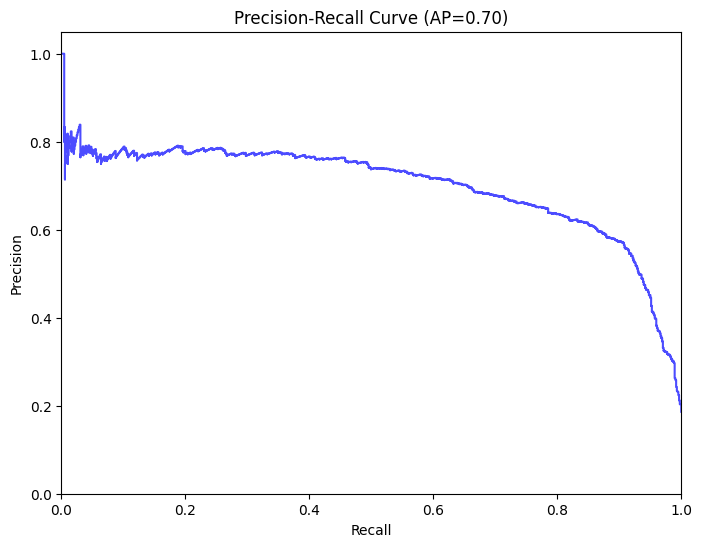

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Obtain decision function scores
model = LinearSVC(C=0.001, class_weight = 'balanced', random_state = 42)
model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, decision_function)
average_precision = average_precision_score(y_test, decision_function)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [70]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight = 'balanced', random_state = 42)
svc.fit(X_train_tfidf,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=42)

In [72]:
print("TF - IDF SVC MODEL")
eval(svc, X_train_tfidf, X_test_tfidf)

TF - IDF SVC MODEL
[[3023  661]
 [ 125  718]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      3684
           1       0.52      0.85      0.65       843

    accuracy                           0.83      4527
   macro avg       0.74      0.84      0.77      4527
weighted avg       0.88      0.83      0.84      4527

Train_Set
[[12035  2815]
 [  481  2776]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14850
           1       0.50      0.85      0.63      3257

    accuracy                           0.82     18107
   macro avg       0.73      0.83      0.75     18107
weighted avg       0.88      0.82      0.83     18107



In [73]:
model = LinearSVC(C=0.001, class_weight = 'balanced', random_state = 42)
scores = cross_validate(model, X_train_tfidf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.486728
train_precision,0.494863
test_recall,0.832968
train_recall,0.850953
test_f1,0.614282
train_f1,0.625798
test_accuracy,0.811785
train_accuracy,0.816946


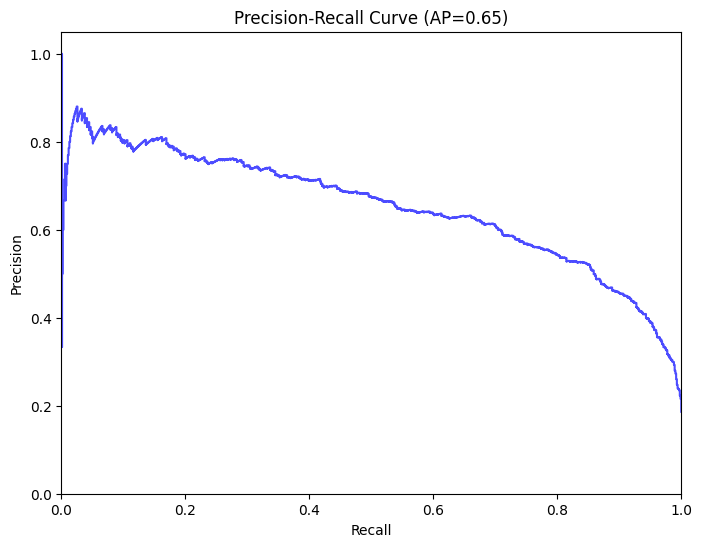

In [74]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Obtain decision function scores
model = LinearSVC(C=0.001, class_weight = 'balanced', random_state = 42)
model.fit(X_train_tfidf, y_train)

decision_function = model.decision_function(X_test_tfidf)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, decision_function)
average_precision = average_precision_score(y_test, decision_function)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [75]:
decision_function

array([-0.1483266 ,  0.12461652, -0.08240974, ...,  0.12222922,
        0.24455265, -0.0616779 ])

In [76]:
y_pred = svc.predict(X_test_tfidf)
decision_function= svc.decision_function(X_test_tfidf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = 5,
                            class_weight="balanced",
                            random_state = 42, n_jobs = -1) #
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [78]:
print("Countvectorizer - RF MODEL")
eval(rf, X_train_count, X_test_count)

Countvectorizer - RF MODEL
[[3088  596]
 [ 184  659]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3684
           1       0.53      0.78      0.63       843

    accuracy                           0.83      4527
   macro avg       0.73      0.81      0.76      4527
weighted avg       0.87      0.83      0.84      4527

Train_Set
[[12504  2346]
 [  576  2681]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     14850
           1       0.53      0.82      0.65      3257

    accuracy                           0.84     18107
   macro avg       0.74      0.83      0.77     18107
weighted avg       0.88      0.84      0.85     18107



In [79]:
model = RandomForestClassifier(n_estimators = 100,
                            max_depth = 5,
                            class_weight="balanced",
                            random_state = 42, n_jobs = -1)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.508769
train_precision,0.529971
test_recall,0.799804
train_recall,0.839593
test_f1,0.621818
train_f1,0.649766
test_accuracy,0.824984
train_accuracy,0.837190


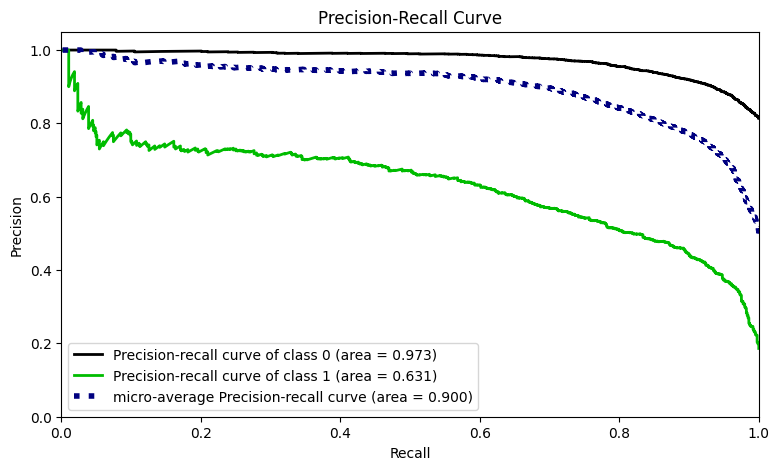

In [80]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(n_estimators = 100,
                            max_depth = 5,
                            class_weight="balanced",
                            random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [81]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [82]:
rf = RandomForestClassifier(n_estimators = 500,
                            max_depth = 3,
                            class_weight="balanced",
                            max_samples = 0.6,
                            random_state = 42, n_jobs = -1)

rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_samples=0.6,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [83]:
print("TF - IDF RF MODEL")
eval(rf, X_train_tfidf, X_test_tfidf)

TF - IDF RF MODEL
[[3026  658]
 [ 136  707]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      3684
           1       0.52      0.84      0.64       843

    accuracy                           0.82      4527
   macro avg       0.74      0.83      0.76      4527
weighted avg       0.88      0.82      0.84      4527

Train_Set
[[12198  2652]
 [  441  2816]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14850
           1       0.51      0.86      0.65      3257

    accuracy                           0.83     18107
   macro avg       0.74      0.84      0.77     18107
weighted avg       0.88      0.83      0.84     18107



In [84]:
model = RandomForestClassifier(n_estimators = 500,
                            max_depth = 3,
                            class_weight="balanced",
                            max_samples = 0.6,
                            random_state = 42, n_jobs = -1)

scores = cross_validate(model, X_train_tfidf, y_train,
                        scoring = ['precision','recall','f1','accuracy']
                        , cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.497030
train_precision,0.520461
test_recall,0.825291
train_recall,0.857299
test_f1,0.620310
train_f1,0.647670
test_accuracy,0.818192
train_accuracy,0.832226


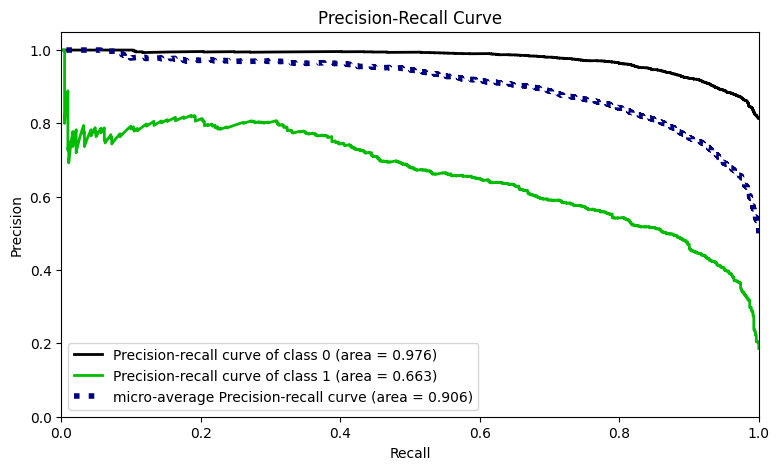

In [85]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(n_estimators = 500,
                            max_depth = 3,
                            class_weight="balanced",
                            max_samples = 0.6,
                            random_state = 42, n_jobs = -1)


model.fit(X_train_tfidf, y_train)

y_pred_proba = model.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [86]:
y_pred = rf.predict(X_test_tfidf)
y_pred_proba= rf.predict_proba(X_test_tfidf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

ada.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

In [ ]:
print("Countvectorizer Ada MODEL")
eval(ada, X_train_count, X_test_count)

In [ ]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# model = model.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

scores = cross_validate(model, X_train_count, y_train,
                scoring = ['precision','recall','f1','accuracy'],
                        fit_params =  {"sample_weight" : class_weights[y_train]},
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.559598
train_precision    0.592737
test_recall        0.803483
train_recall       0.857162
test_f1            0.659550
train_f1           0.700831
test_accuracy      0.850831
train_accuracy     0.868363
dtype: float64

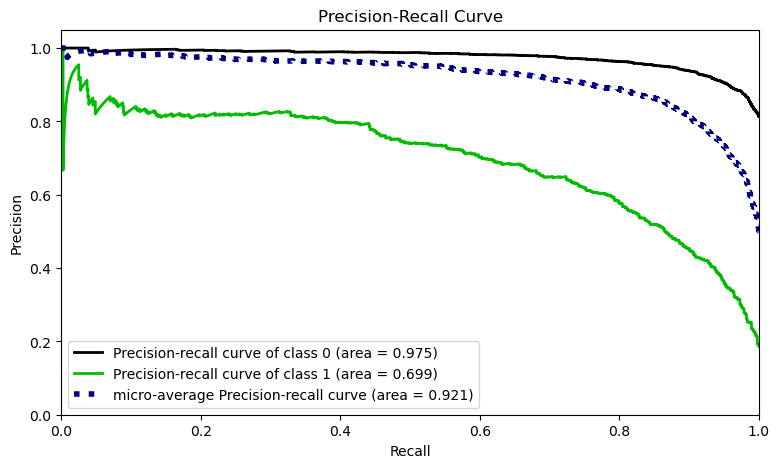

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

ada = AdaBoostClassifier(n_estimators = 100, random_state = 42, learning_rate = 0.7)

# Calculate class weights based on class frequencies
 # Replace with your actual class labels

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Fit the model with sample weights
ada.fit(X_train_tfidf, y_train, sample_weight=class_weights[y_train])

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [ ]:
print("TF - IDF Ada MODEL")
eval(ada, X_train_tfidf, X_test_tfidf)

TF - IDF Ada MODEL
[[3065  619]
 [ 165  678]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3684
           1       0.52      0.80      0.63       843

    accuracy                           0.83      4527
   macro avg       0.74      0.82      0.76      4527
weighted avg       0.87      0.83      0.84      4527

Train_Set
[[12419  2431]
 [  471  2786]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     14850
           1       0.53      0.86      0.66      3257

    accuracy                           0.84     18107
   macro avg       0.75      0.85      0.78     18107
weighted avg       0.89      0.84      0.85     18107



In [ ]:
model = AdaBoostClassifier(n_estimators = 100, random_state = 42, learning_rate = 0.7)
# model.fit(X_train_tf_idf, y_train, sample_weight=sample_weights)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

scores = cross_validate(model, X_train_tfidf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10,
                        fit_params =  {"sample_weight" : class_weights[y_train]},
                        return_train_score=True)


df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.508049
train_precision    0.535065
test_recall        0.806552
train_recall       0.856616
test_f1            0.623247
train_f1           0.658684
test_accuracy      0.824653
train_accuracy     0.840307
dtype: float64

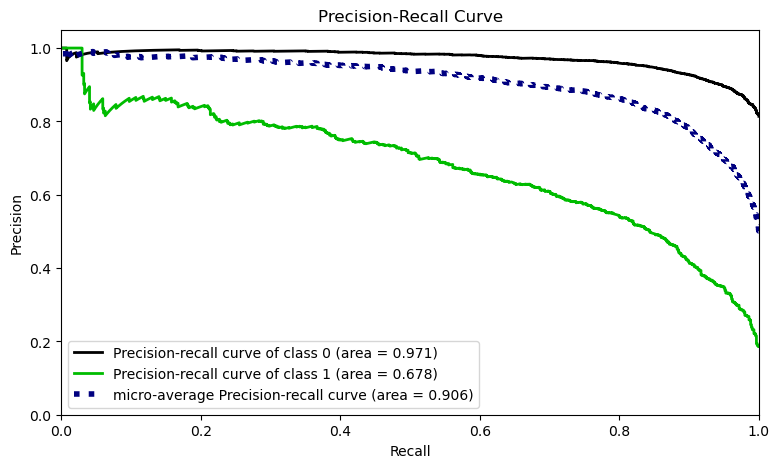

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 100, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_tfidf)
y_pred_proba= ada.predict_proba(X_test_tfidf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
X = df["review_text"].values
y = df["recommended"].map({0:1, 1:0}).values

In [ ]:
import contractions
df['review_text'] = df['review_text'].apply(lambda x: contractions.fix(x))

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer

num_words = 15001

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'fabric': 44,
 'at': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'really': 50,
 'more': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 'back': 63,
 'had': 64,
 'because': 65,
 'can': 66,
 '\r': 67,
 'cute': 68,
 'nice': 69,
 'comfortable': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'looks': 74,
 'when': 75,
 'all': 76,
 'fits': 77,
 'down': 78,
 'bit': 79,


In [ ]:
len(tokenizer.word_index)

14170

### Converting tokens to numeric

In [ ]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
len(X_train_num_tokens)

20370

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

2293

In [ ]:
# X_train.iloc[11968]

In [ ]:
max_tokens = 104

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9772704958271968

In [ ]:
sum(num_tokens <= max_tokens)

19907

In [ ]:
len(num_tokens)

20370

### Fixing token counts of all documents (pad_sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
display(X_train_pad.shape)
display(X_test_pad.shape)

(20370, 104)

(2264, 104)

In [ ]:
np.array(X_test_num_tokens[28])

array([   7, 1042,    6,  193,    2,  223,    5,   77,  149, 1088,  315,
        726,    3,   91,    1,   98,  197,   39,   90,  150, 6881,  173,
         87,    3,    1, 1685, 3297,  503,  278,  219, 3297, 2774,    5,
         78,    1,   63,  427,  470,   27,   22,   23,  460,  196,   12,
        253,  449,  639])

In [ ]:
len(np.array(X_test_num_tokens[28]))

47

In [ ]:
X_test_pad[28]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    7, 1042,    6,  193,    2,  223,    5,   77,  149,
       1088,  315,  726,    3,   91,    1,   98,  197,   39,   90,  150,
       6881,  173,   87,    3,    1, 1685, 3297,  503,  278,  219, 3297,
       2774,    5,   78,    1,   63,  427,  470,   27,   22,   23,  460,
        196,   12,  253,  449,  639])

In [ ]:
np.array(X_train_num_tokens[11968])

array([   7,    6,  313,    4,  283,  290,   18,    2,  199,    5,    9,
          1,  107,   11,    1, 1212,   20,   88,  134, 3338,   16,  128,
         15,  117,   56,  552,    8,  178,   11,    5,   15,    4,   22,
        155,    3,    2,  105,   32,    4,  180,    9,  103, 1170,    2,
        166,    1,   18,    3,  104,    5,  751,    3,    5,   26,  149,
         81,    6,  477,    2,  101,    5,  132,    4,   79,   80,   12,
        333,    2,   38,  416,    3,  742,  167,  684,  183,   10,    4,
         79, 2730,    9,    1,  809,    3,  687,  195,    5,   88,   59,
       1458, 1160,    3,    4,  469,    9,    1,   63,    5,    6,   16,
        185,    3,  872,    3,  127,   70,    5, 2151])

In [ ]:
X_train_pad[11968]

array([   4,  283,  290,   18,    2,  199,    5,    9,    1,  107,   11,
          1, 1212,   20,   88,  134, 3338,   16,  128,   15,  117,   56,
        552,    8,  178,   11,    5,   15,    4,   22,  155,    3,    2,
        105,   32,    4,  180,    9,  103, 1170,    2,  166,    1,   18,
          3,  104,    5,  751,    3,    5,   26,  149,   81,    6,  477,
          2,  101,    5,  132,    4,   79,   80,   12,  333,    2,   38,
        416,    3,  742,  167,  684,  183,   10,    4,   79, 2730,    9,
          1,  809,    3,  687,  195,    5,   88,   59, 1458, 1160,    3,
          4,  469,    9,    1,   63,    5,    6,   16,  185,    3,  872,
          3,  127,   70,    5, 2151])

### Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True)) # units equal to word embedding   - best practice
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 104, 50)           750050    
                                                                 
 dropout_6 (Dropout)         (None, 104, 50)           0         
                                                                 
 gru_6 (GRU)                 (None, 104, 50)           15300     
                                                                 
 dropout_7 (Dropout)         (None, 104, 50)           0         
                                                                 
 gru_7 (GRU)                 (None, 104, 25)           5775      
                                                                 
 dropout_8 (Dropout)         (None, 104, 25)           0         
                                                                 
 gru_8 (GRU)                 (None, 12)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 2,
                           restore_best_weights=True,
                           verbose=1)

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 2.7601626016260163, 1: 0.6106115107913669}

In [ ]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=210,
    class_weight=class_weights,  # Use class weights to handle imbalanced classes
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stop]
)


Epoch 1/10
97/97 [==============================] - 26s 227ms/step - loss: 0.5174 - recall: 0.7209 - val_loss: 0.3390 - val_recall: 0.8560
Epoch 2/10
97/97 [==============================] - 22s 227ms/step - loss: 0.2997 - recall: 0.8594 - val_loss: 0.3293 - val_recall: 0.8554
Epoch 3/10
97/97 [==============================] - 23s 239ms/step - loss: 0.2398 - recall: 0.8857 - val_loss: 0.3517 - val_recall: 0.8436
Epoch 3: early stopping


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.517414,0.720863,0.338998,0.855987
1,0.299704,0.859412,0.329277,0.855448
2,0.239819,0.885671,0.351743,0.843581


<Axes: >

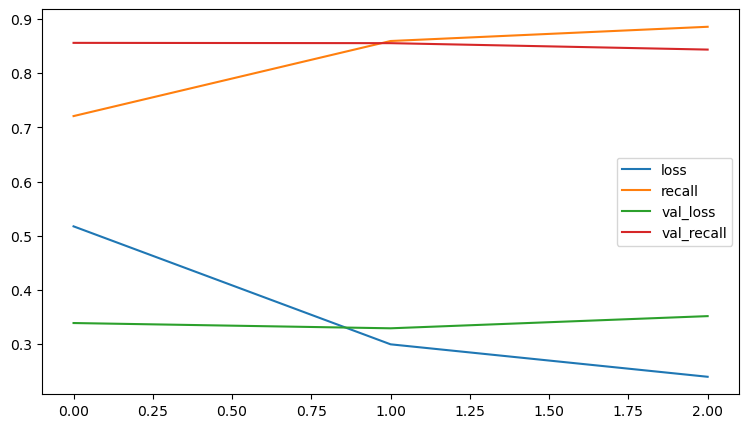

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_test_pad, y_test)

71/71 [==============================] - 1s 18ms/step - loss: 0.3390 - recall: 0.8560


[0.338998407125473, 0.8559870719909668]

In [ ]:
model.evaluate(X_train_pad, y_train)

637/637 [==============================] - 11s 17ms/step - loss: 0.2929 - recall: 0.8743


[0.29292991757392883, 0.8743405342102051]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

y_train_pred = model.predict(X_train_pad) >= 0.5



print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 11s 17ms/step
[[ 348   62]
 [ 267 1587]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       410
           1       0.96      0.86      0.91      1854

    accuracy                           0.85      2264
   macro avg       0.76      0.85      0.79      2264
weighted avg       0.89      0.85      0.86      2264

-------------------------------------------------------
[[ 3305   385]
 [ 2096 14584]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      3690
           1       0.97      0.87      0.92     16680

    accuracy                           0.88     20370
   macro avg       0.79      0.89      0.82     20370
weighted avg       0.91      0.88      0.89     20370



71/71 [==============================] - 1s 17ms/step


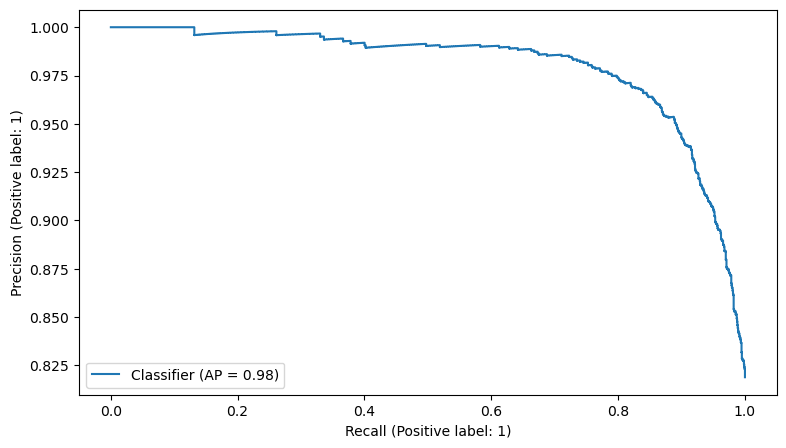

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9798255604579951

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [ ]:
!pip install transformers

### Allocation of TPU cores

In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  #TPUClusterResolver, TPU'ların bulunduğu kümeyi (cluster) bulmak için kullanılır.
  print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
#Bu kod satırı, TensorFlow'u daha önce oluşturulan tpu nesnesi ile belirtilen TPU kümesine bağlar.
tf.tpu.experimental.initialize_tpu_system(tpu)
#Bu adım, TPU sistemini başlatır ve kullanıma hazır hale getirir.
tpu_strategy = tf.distribute.TPUStrategy(tpu)
#Modeli birden fazla TPU çekirdeğine dağıtarak eğitimi hızlandırır.

### Read Data

In [ ]:
df.head()

,review_text,recommended,cleaned_review_text
0,Absolutely wonderful - silky and sexy and comf...,0,absolutely wonderful silky sexy comfortable
1,Love this dress! it is sooo pretty. i happen...,0,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,1,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it is fun, f...",0,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,0,shirt flattering due adjustable front tie perf...


### Train test split

In [ ]:
X_train

array(["The embroidery around the chest/collar is lovely.  but the lower half of the shirt didn't fit my post-pregnancy bod.  it's going back.",
       "I am torn about this dress. the print is very pretty and the fabric has a gentle flow to it. the top part is great but the portion below the chest reminded me of a tent. it is tricky to pull off if you are well-endowed on the top or wear a padded bra. i liked the look better when i tied it at the back with the ultra-thin belt straps which gave some shape to the waist. i agree with the other reviewer that a slim person could carry the look well. i usually don't return online purchases unless they",
       "This is my second pair of these jeans (i ruined the first pair and immediately ordered a replacement). wear them all the time. i did go up one size to get a better fit (i don't exactly have slim thighs--ha!), but other than that, they are pretty perfect!",
       ...,
       'I tried this on in the store to see if it would be my go to

In [ ]:
X_test

array(['I purchased this top in a regular small and surprisingly, it fits me very well (i\'m 5\'2", 34b, 26 waist, 36 hips). the hem falls about two inches longer than shown on the model. i like the v-neck the most because the ruffles are not too much, and it\'s not too low cut. i purchased the white color because i think the pattern is unique and it\'s brighter for spring/summer. i think skinny jeans and ankle boots or wedges would make the look very stylish. by the way, the fabric is super soft (but not w',
       "I usually wear size 4 for dress, but this is the first time ever i have to go down to size 0, and it fits perfectly. well made, maybe a bit stiff around armholes, nothing major. i love the length as i don't like to show my knees. great color combinations, although this supposed to be a summer dress, it looks great for fall, just need to add a jacket, a pair of boots and i'm good to go, feeling pretty!",
       'I bought this for the office and received many compliments abo

### Tokenization

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


### Fixing token counts of all documents

In [ ]:
sum(np.array(num_of_sent_tokens) <= 130) / len(num_of_sent_tokens)

0.9645557191948945

In [ ]:
train_sentence_tokens = tokenizer(list(X_train),
                                  max_length=130,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

In [ ]:
np.array(train_sentence_tokens['input_ids'])

array([[  101,  1996, 29507, ...,     0,     0,     0],
       [  101,  1045,  2572, ...,     0,     0,     0],
       [  101,  2023,  2003, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2699, ...,     0,     0,     0],
       [  101,  2122,  6471, ...,     0,     0,     0],
       [  101,  2023,  4377, ...,     0,     0,     0]])

In [ ]:
np.array(train_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Data to Dataset Format

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  sentence_tokens = tokenizer(list(X),
                              max_length=seq_len,
                              truncation=True,
                              padding='max_length',
                              add_special_tokens=True)

  return np.array(sentence_tokens['input_ids']), np.array(sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20370, 162)
Xmask_train.shape : (20370, 162)
Xids_test.shape   : (2264, 162)
Xmask_test.shape  : (2264, 162)


In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

### Create Optimizer

In [ ]:
!pip install -q tf-models-official

In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32') # dtype = int32

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
  # functional api
    x = Dense(80, activation='relu')(embeddings) #80-160-50.
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
# import tensorflow as tf

# print(tf.__version__)
# !pip install tensorflow==2.10.0

In [ ]:
import tensorflow as tf
strategy = tf.distribute.TPUStrategy(resolver)
with strategy.scope(): # for fast running with tpu
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5

  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [ ]:
pd.Series(y).value_counts(normalize=True)

In [ ]:
weights = {0:0.18, 1:0.81}

In [ ]:
model3.summary()
# bert - 110 M parameters

### Transformation Dataset to TF_dataset Fromat

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Model Fiting

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight = weights)

### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba);

In [ ]:
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "CatBoost_count" , "XGBoost_count","NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "CatBoost_tfidf", "XGBoost_tfidf","DL", "BERT_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, cb_count_f1, xgb_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, cb_tfidf_f1, xgb_tfidf_f1, DL_f1, BERT_with_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, cb_count_rec, xgb_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, cb_tfidf_rec, xgb_tfidf_rec, DL_rec, BERT_with_weighted_rec
                                         ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, cb_AP_count, xgb_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, cb_AP_tfidf, xgb_AP_tfidf, DL_AP, BERT_with_weighted_AP
                                                ]})




plt.figure(figsize=(18, 10))


red_palette = sns.color_palette("Reds_d")


plt.subplot(131)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("Recall Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(132)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("F1 Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(133)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette=red_palette)
ax.set_xlabel("Average Precision Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()
plt.show()

### Conclusion

In [ ]:
Sentiment Analysis of Women's Clothes Reviews
In this project, we employed sentiment analysis to determine whether a product is recommended or not. Various machine learning algorithms were utilized to enhance prediction accuracy, including:

ML algorithms (Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest, Ada Boosting, CatBoost, and XGBoost)
Deep learning algorithm
BERT algorithm
The dataset is sourced from Women's Clothing Reviews, accessible on Kaggle.

After thorough examination, it was evident that the BERT model outperformed other models, leading to predictions based on its outcomes.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___